In [32]:
import pandas as pd
from collections import Counter
import itertools

## Initializing the Matrix

In [54]:
names_map = []
with open("TEST_MAP.namesMap") as namesMap:
    for name in namesMap:
        names_map.append(name.split()[1])
        
df = pd.DataFrame(0.0, columns = names_map, index=names_map)

## Count colors and set groups

In [55]:
groups = {}
colors = []
with open("TEST_MAP.map") as MAP:
    for line in MAP:
        line = line.rstrip('\n')
        if ":" in line:
            colors.append(line.split(":")[1])
        elif "-" in line:
            s = line.split("-")
            groups[s[0]] = s[1].split(",")[:-1]

colors = Counter(colors)

## Fill the Matrix

In [56]:
# Reverse Combination

for color, tr_ids in groups.items():
    color_count = colors[color]
    if len(tr_ids) == 1:
        df[tr_ids[0]][tr_ids[0]] = color_count

    for combination in itertools.combinations(tr_ids,2):
        df[combination[0]][combination[1]] += color_count
        df[combination[1]][combination[0]] += color_count

## Normalization

In [ ]:
new_val = 0.0
for name in itertools.combinations_with_replacement(names_map,2):
    if name[0] == name[1]:
        continue
    
    print (name)
    
    curr_value = df[name[0]][name[1]]
    print ("Current: ", curr_value)
    
    new_val = curr_value / min(df[name[0]][name[0]],df[name[1]][name[1]])
    #print(new_val)
    print ("New: ", new_val)
    
    df[name[0]][name[1]] = new_val
    df[name[1]][name[0]] = new_val

In [60]:
for name in itertools.combinations_with_replacement(names_map,2):
    if name[0] == name[1]:
        df[name[1]][name[1]] = 1
        df[name[0]][name[0]] = 1
    else:
        continue

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
%matplotlib inline

In [65]:
linked = linkage(df, 'single')
labelList = range(1, 11)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linked)

In [68]:
linked

array([[  1.        ,   7.        ,   1.35139139,   2.        ],
       [  5.        ,   9.        ,   1.3830121 ,   3.        ],
       [  8.        ,  10.        ,   1.383139  ,   4.        ],
       [  2.        ,   3.        ,   1.38346979,   2.        ],
       [  0.        ,   4.        ,   1.41421356,   2.        ],
       [  6.        ,  13.        ,   1.41421356,   3.        ],
       [ 12.        ,  14.        ,   1.41438064,   5.        ],
       [ 11.        ,  15.        ,   1.41458689,   9.        ]])

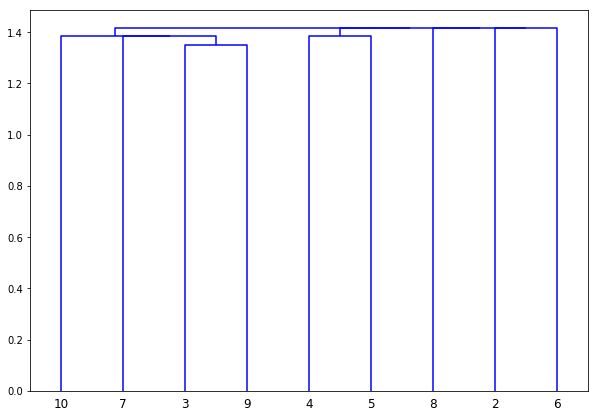

In [70]:
plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  